# Exploring the Pokedex

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Let's start by loading the dataset into a pandas DataFrame.

In [360]:
df = pd.read_csv('C:/Users/Redwan Huq/Dropbox/data/pokemon.csv')

To get an understanding of the dataset, let's take a glance.

In [361]:
# Show the first five rows
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [362]:
# Show a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Here's a quick description of each column:
- #: Pokedex entry number of the Pokemon
- Name: name of the Pokemon
- Type 1: primary type of the Pokemon
- Type 2: secondary type of the pokemon
- Total: sum of all the statistics
- HP: hit points or life
- Attack: determines attack power when using a physical move
- Defense: determines damage taken when hit by a physical move
- Sp. Atk: determines attack power when using a special move
- Sp. Def: determines damage taken when hit by a special move
- Speed: determines which Pokemon will attack first in each round
- Generation: refers to which set the Pokemon was released in
- Legendary: True if a Pokemon is considered a legendary Pokemon

By generation 6, there are only 721 known Pokemon species, meaning we likely have duplicate rows. In addition, not all Pokemon species have a secondary type, which explains the value in *Type 2*. Furthermore, the dataset has two observational units: the Pokemon's identity and statistics, which can be normalized into two tables to prevent future inconsistencies. 

## Cleaning the data
Before any rigorous cleaning, let's do some housekeeping.

In [363]:
# Rename the # column to id
df.rename(columns={'#': 'id'}, inplace=True)

# Remove the Total column as this information is implicit
df.drop('Total', axis='columns', inplace=True)

# Convert all column labels to lower case
df.columns = df.columns.str.lower()

It's time to take a look at all rows that are duplicated using the *id* column.

In [364]:
df[df.duplicated('id', keep=False)].head()

,id,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False


We can see that certain Pokemon have multiple forms but share the same *id* value. Since these additional forms represent the same Pokemon species albeit with higher statistics, let's exclude these duplicates except for their first instance.

In [365]:
df.drop_duplicates('id', keep='first', inplace=True)

Since all Pokemon have a primary type but not necessarily a secondary type, let's fill in the missing values in the *type 2* column with *None*.

In [366]:
df['type 2'].fillna('None', inplace=True)

Since the dataset contains both identity and statistics information of each Pokemon, let's separate these two observational units into separate tables, *pokedex* and *stats*, respectively.

In [367]:
# Select only the identity-related columns from original dataset
pokedex = df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]

# Join the new pokedex table with the original dataset to generate the
# stats table
stats = pd.merge(df, pokedex, on='id')[['id', 'hp', 'attack', 'defense', 
                                        'sp. atk', 'sp. def', 'speed']]

Now let's review the two tables along with our newly made changes.

In [368]:
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [369]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 6 columns):
id            721 non-null int64
name          721 non-null object
type 1        721 non-null object
type 2        721 non-null object
generation    721 non-null int64
legendary     721 non-null bool
dtypes: bool(1), int64(2), object(3)
memory usage: 34.5+ KB


In [370]:
stats.head()

,id,hp,attack,defense,sp. atk,sp. def,speed
0,1,45,49,49,65,65,45
1,2,60,62,63,80,80,60
2,3,80,82,83,100,100,80
3,4,39,52,43,60,50,65
4,5,58,64,58,80,65,80


In [371]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 7 columns):
id         721 non-null int64
hp         721 non-null int64
attack     721 non-null int64
defense    721 non-null int64
sp. atk    721 non-null int64
sp. def    721 non-null int64
speed      721 non-null int64
dtypes: int64(7)
memory usage: 45.1 KB


## Questions to answer
1. How are Pokemon distributed across generations?
2. What are the most common types of Pokemon?
3. What are the strongest and weakest Pokemon species?
4. What are the strongest and weakest Pokemon types?
5. Are there any trends regarding a Pokemon's statistics and its type?

## 1. How are Pokemon distributed across generations?

To answer this question, let's take a look at the total number of Pokemon in each generation.

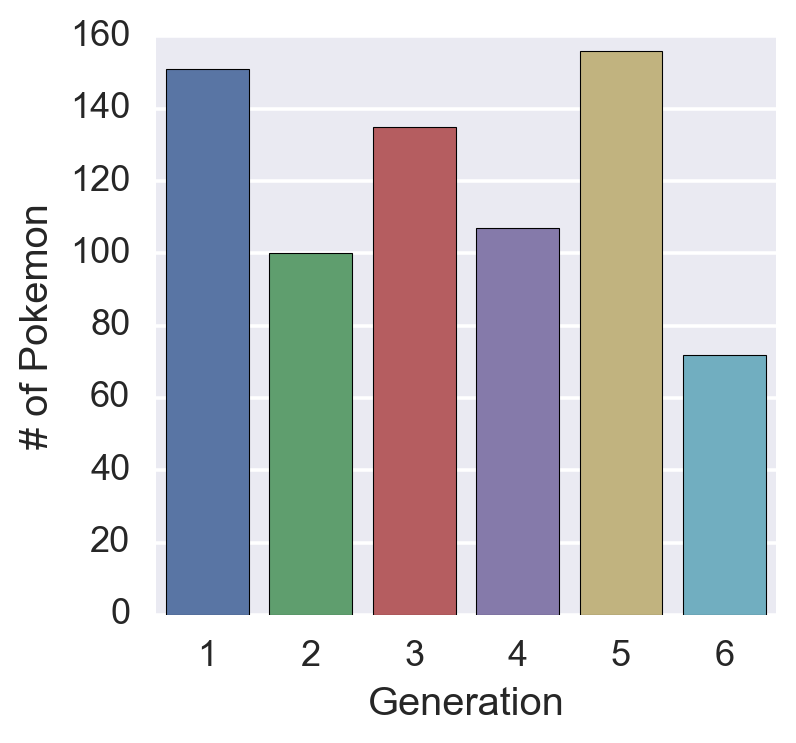

In [413]:
# Set the plot style for better readability 
sns.set_context('talk')

# Display a categorial histogram and label axes
sns.factorplot(
    x='generation', 
    data=pokedex, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

Since a Pokemon's primary type (*type 1*) is typically associated with its appearance and move list, let's dig deeper and examine the distribution of primary types across generations.

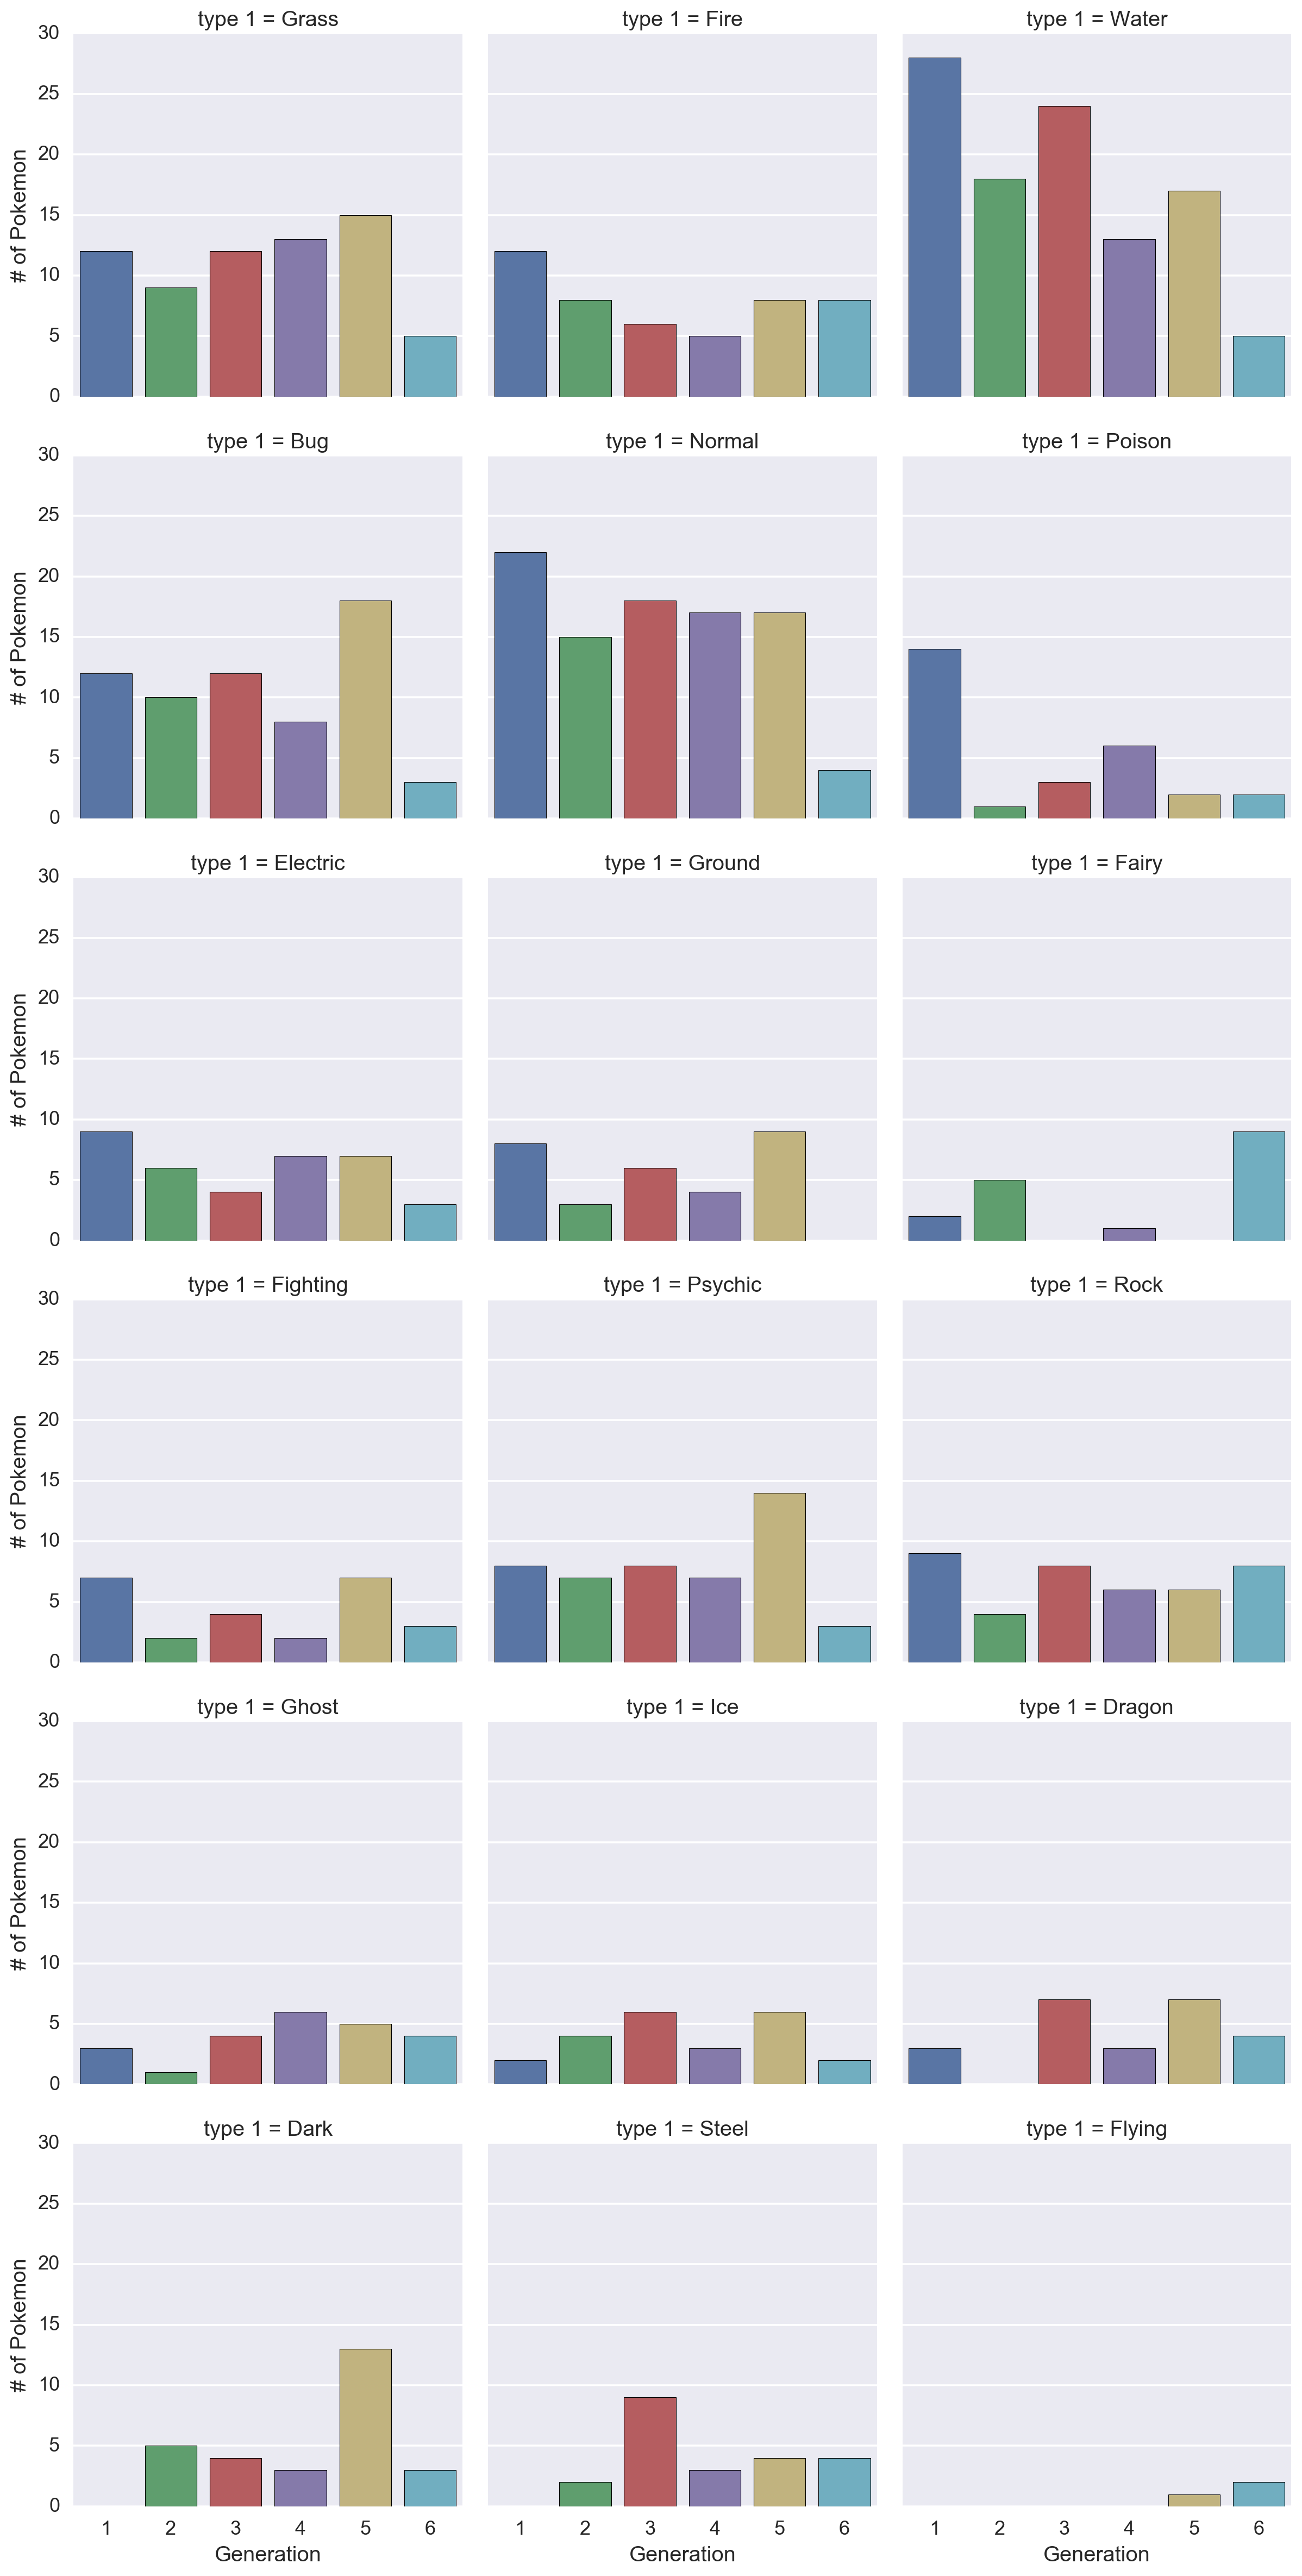

In [412]:
# Display a faceted categorical histogram and label axes
sns.factorplot(
    x='generation',
    data=pokedex,
    col='type 1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

A few conclusions can be drawn from these plots:
- Generation 1 was the best time for Poison-type Pokemon; they have been added less and less over time
- Generation 5 received a surge of new Psychic- and Dark-type Pokemon, while Steel-type Pokemon received a large boost in generation 3.
- Ground-type Pokemon had a strong presence in every generation except generaiton 6

## 2. What are the most common types of Pokemon?

To answer this question, let's begin by investigating if there are any unique primary or secondary Pokemon types.

In [374]:
# Compute the unique types between primary and secondary types, and vice versa
unique_type1 = np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type2 = np.setdiff1d(pokedex['type 2'], pokedex['type 1'])

# Display any unique primary types
print('Unique Type 1: ', end='')
if unique_type1.size == 0:
    print('No unique types')
else:
    for unique_type in unique_type1:
        print(unique_type)

# Display any unique secondary types
print('Unique Type 2: ', end='')
if unique_type2.size == 0:
    print(0)
else:
    for unique_type in unique_type2:
        print(unique_type)

Unique Type 1: No unique types
Unique Type 2: None


Neither group has a unique type although as noted earlier, not all Pokemon have a secondary type. Armed with this information, let's count the total number of primary and secondary types.

In [375]:
# Group by primary or secondary type and compute the length of each group
type1, type2 = pokedex.groupby('type 1'), pokedex.groupby('type 2')
print('Type 1 count: {}, Type 2 count: {}'.format(len(type1), len(type2)))

Type 1 count: 18, Type 2 count: 19


There are a total of 18 primary types and 19 secondary types (the single extra secondary type refers to Pokemon without a secondary type). 

To understand the most common primary and secondary types, let's examine the distributions for each.

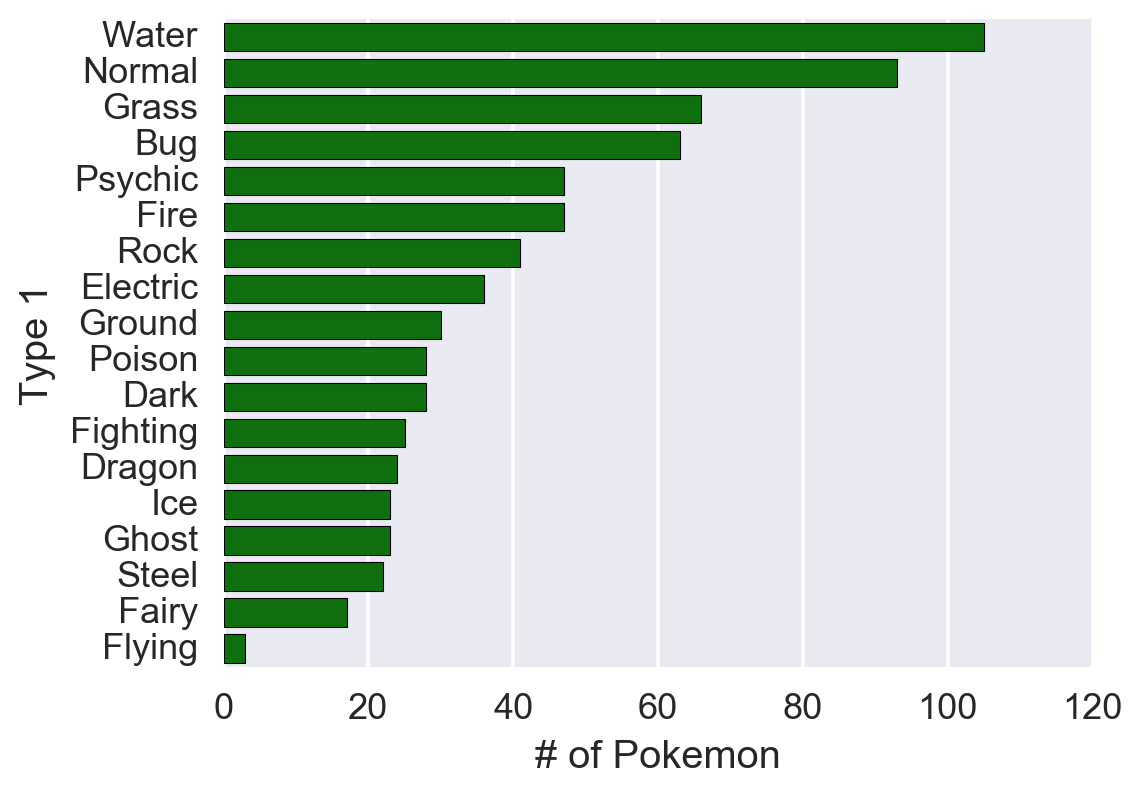

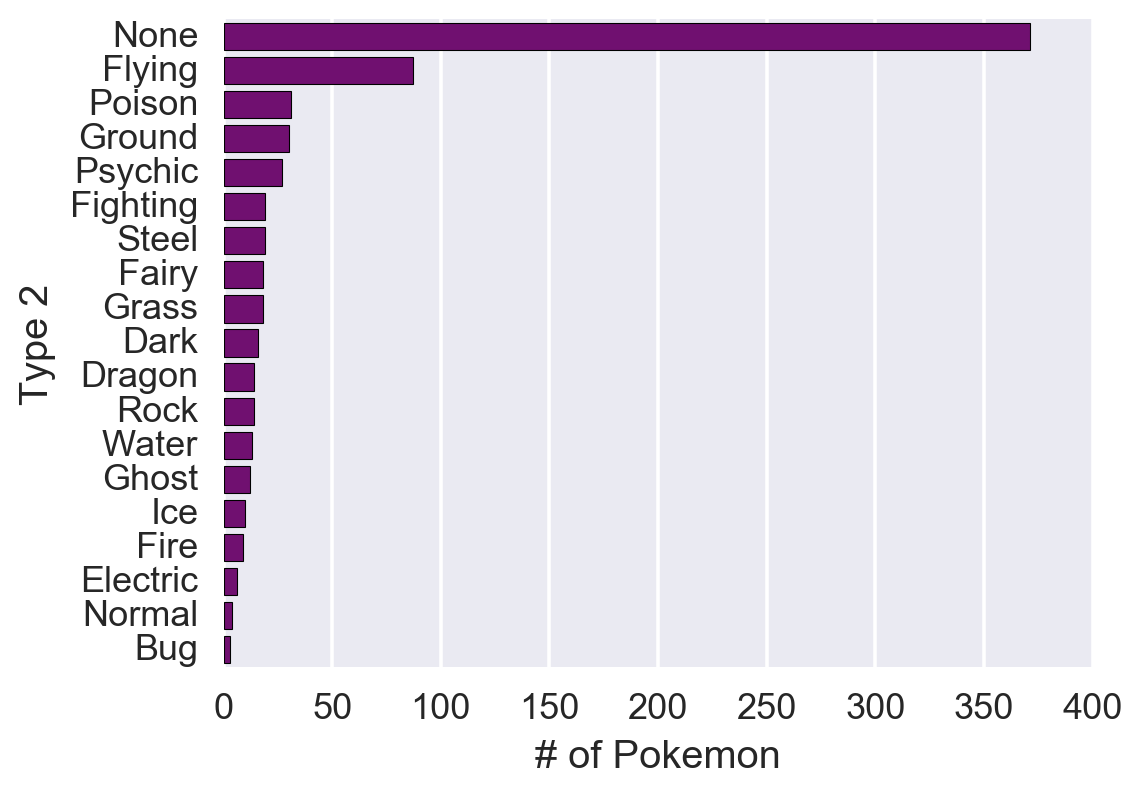

In [394]:
# Displays categorical histogram of primary types
sns.factorplot(
    y='type 1',
    data=pokedex,
    kind='count',
    order=pokedex['type 1'].value_counts().index,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 1')

# Displays categorical histogram of secondary types
sns.factorplot(
    y='type 2',
    data=pokedex,
    kind='count',
    order=pokedex['type 2'].value_counts().index,
    aspect=1.5,
    color='purple'
).set_axis_labels('# of Pokemon', 'Type 2');

We can draw a few conclusions from these plots:
- It's not a shock that Normal-type are common as a primary type since they're "generic", but it's a bit surprising that they're outnumbered by Water-type Pokemon.
- Pokemon that do have a secondary type are typically Flying-type--nearly 1 in 7 Pokemon can fly.
- Pokemon with Flying-type as the primary type are extremely rare.

Let's now examine the distribution of Pokemon types across their primary and secondary types.

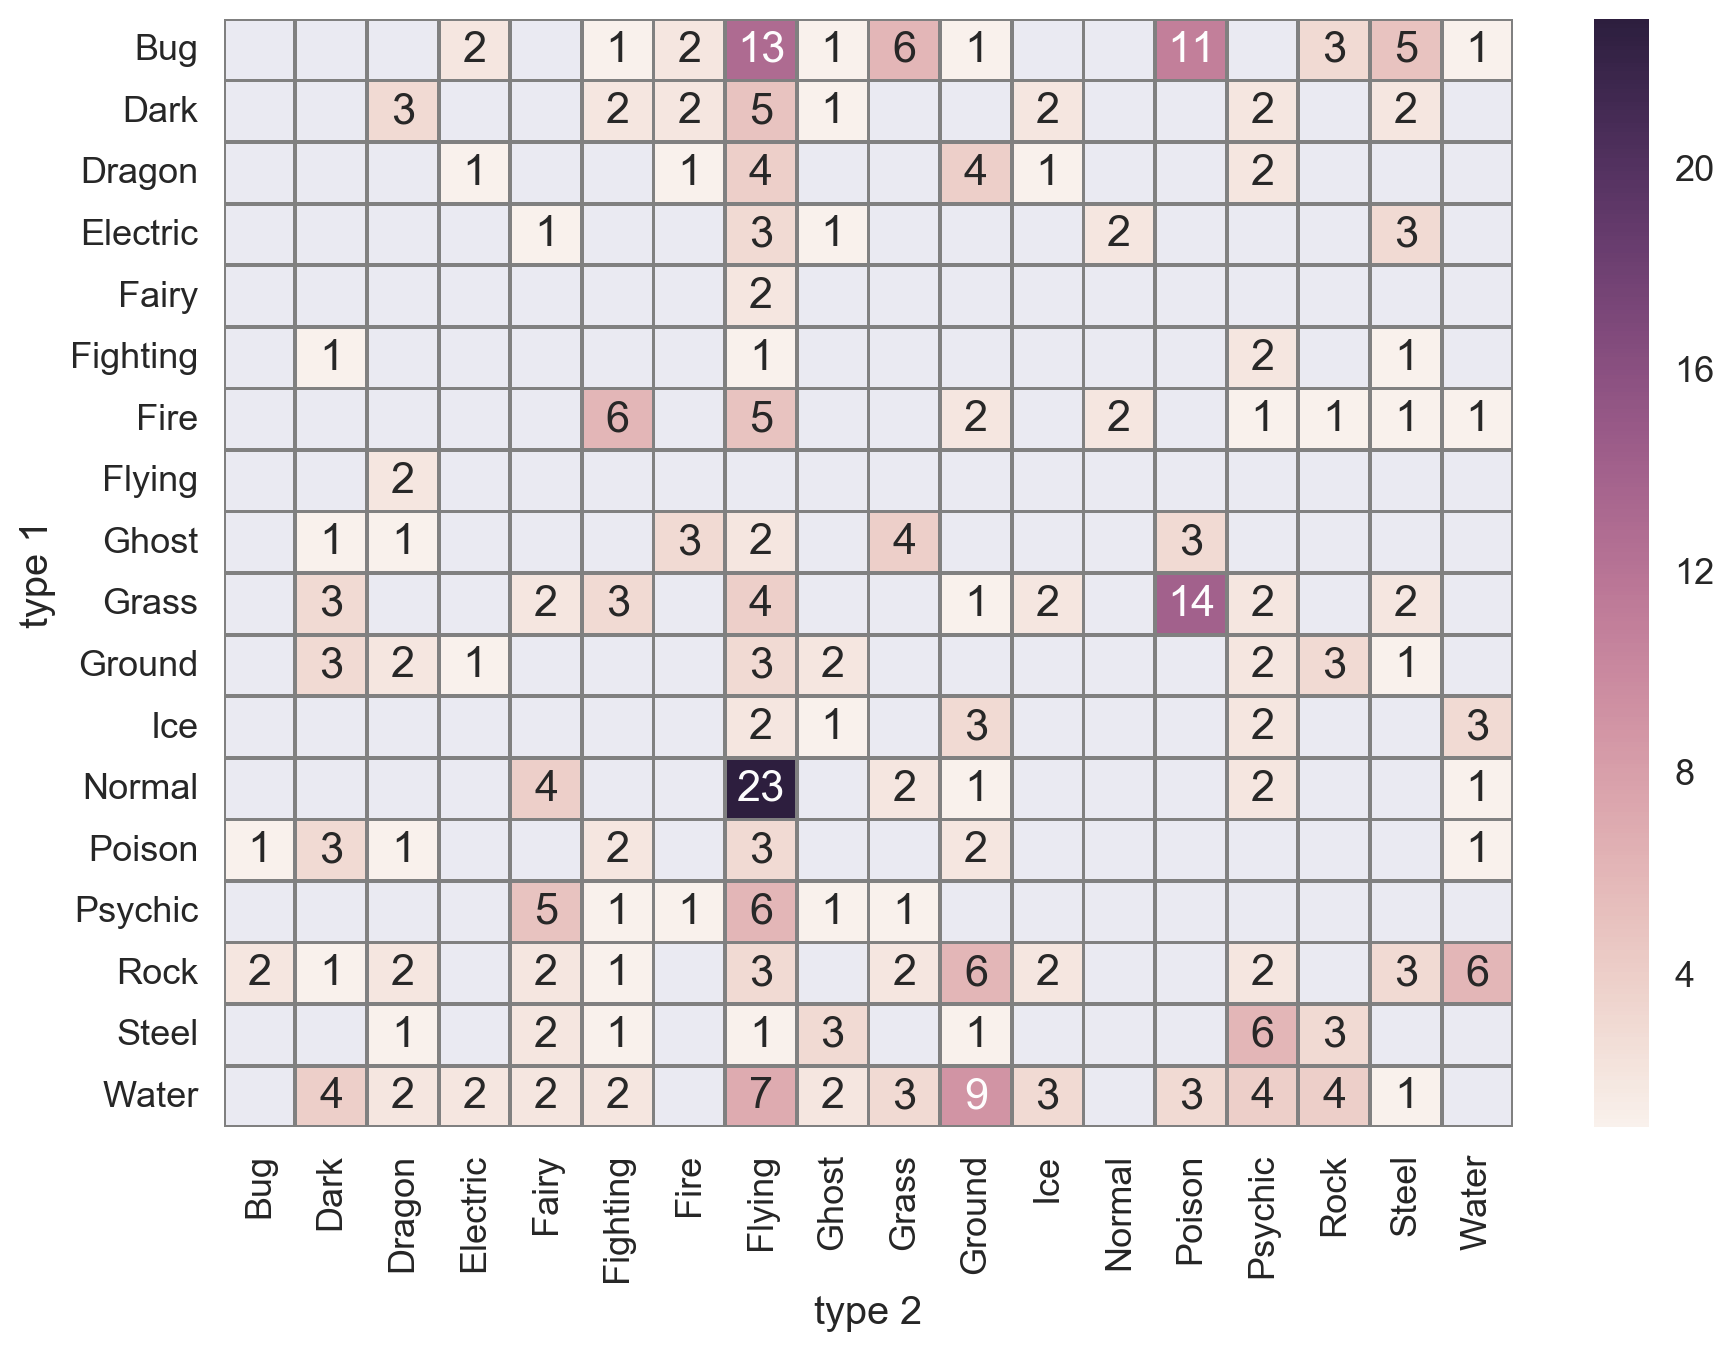

In [404]:
# Remove Pokemon without a secondary type to better highlight results
dual_types = pokedex[pokedex['type 2'] != 'None']

# Display a heatmap using the primary and secondary type, and display the
# number of Pokemon with each combination. Note that the heatmap() function 
# requires the dataset to be 2D.
sns.heatmap(
    dual_types.groupby(['type 1', 'type 2']).size().unstack(),
    linewidths=1,
    linecolor='grey',
    annot=True
);

The plots reveal that several type combinations are exceedingly common: 
- Normal/Flying
- Bug/Flying
- Bug/Poison
- Grass/Poison
- Water/Ground

It's a bit paradoxical there exist Pokemon that have types Fire/Water and Ground/Flying. 

Finally, let's take a look at the distribution of primary types for those Pokemon that don't have a secondary type.

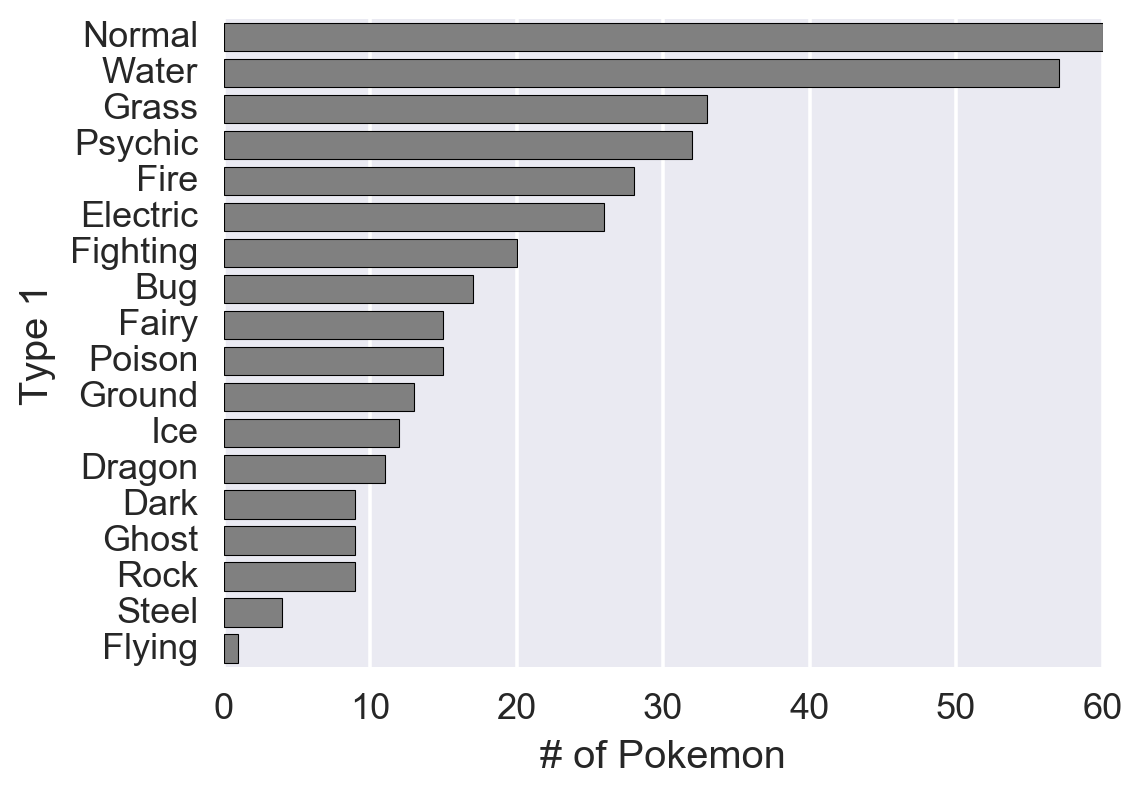

In [378]:
# Remove any Pokemon without a secondary type
single_types = pokedex[pokedex['type 2'] == 'None']

# Displays categorical histogram
sns.factorplot(
    y='type 1', 
    data=single_types,
    kind='count',
    order=single_types['type 1'].value_counts().index,
    aspect=1.5,
    color='grey'
).set_axis_labels('# of Pokemon', 'Type 1');

Nothing too surprising here besides the considerably large proportion of Pokemon that are only Water-type!
## 3. What are the strongest and weakest Pokemon species?
Let's begin by normalizing the statistic columns. We'll define Pokemon strength as the sum of the z-scores of each statistic--the higher the value, the stronger the Pokemon (assuming each statistic is weighted equally).

In [379]:
# Generate a new DataFrame to store the normalized statistics
norm_stats = stats.copy()

In [380]:
# Normalize each statistic column as a z-score
for stat in stats.loc[:, 'hp':'speed']:
    norm_stats[stat] = stats[stat].apply(
        lambda x: (x - stats[stat].mean()) / stats[stat].std())

# Compute the sum of the z-scores for each statistic and store the result in a 
# new column
norm_stats['total'] = norm_stats.loc[:, 'hp':'speed'].sum(axis='columns')

In [381]:
# Join the norm_stats table with the pokedex table based on id number to report
# the ten highest sums
pd.merge(
    pokedex, 
    norm_stats, 
    on='id'
).sort_values('total', ascending=False).head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,total
492,493,Arceus,Normal,None,4,True,1.997038,1.543676,1.688730,1.770023,1.889253,1.990097,10.878816
486,487,GiratinaAltered Forme,Ghost,Dragon,4,True,3.157657,0.855689,1.688730,1.077948,1.889253,0.890307,9.559583
248,249,Lugia,Psychic,Flying,2,True,1.455415,0.511696,2.031255,0.731910,3.153223,1.623500,9.507000
249,250,Ho-oh,Fire,Flying,2,True,1.455415,1.887669,0.661154,1.423986,3.153223,0.890307,9.471754
715,716,Xerneas,Fairy,None,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
716,717,Yveltal,Dark,Flying,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
149,150,Mewtwo,Psychic,None,1,True,1.455415,1.199683,0.661154,2.946551,0.773985,2.356694,9.393482
642,643,Reshiram,Dragon,Fire,5,True,1.223292,1.543676,1.003679,2.808136,1.889253,0.890307,9.358342
483,484,Palkia,Water,Dragon,4,True,0.836418,1.543676,1.003679,2.808136,1.889253,1.256904,9.338066
383,384,Rayquaza,Dragon,Flying,3,True,1.416728,2.575656,0.661154,2.808136,0.773985,1.073605,9.309264


The ten strongest Pokemon are, in order, Arceus, Giratina, Lugia, Ho-oh and Xerneas, Yveltal, Mewtwo, Reshiram, Palkia and Rayquaza. Not surprisingly, they are all legendary Pokemon. Now let's take a look at the weakest Pokemon.

In [382]:
# Join the norm_stats table with the pokedex table based on id number to report
# the ten lowest sums
pd.merge(
    pokedex,
    norm_stats,
    on='id'
).sort_values('total', ascending=False).tail(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,total
348,349,Feebas,Water,None,3,False,-1.871693,-2.068254,-1.736521,-2.036391,-0.527161,0.523710,-7.716310
128,129,Magikarp,Water,None,1,False,-1.871693,-2.240250,-0.537684,-1.863372,-1.828307,0.523710,-7.817596
663,664,Scatterbug,Bug,None,6,False,-1.175321,-1.380267,-1.051471,-1.448127,-1.642429,-1.125976,-7.823592
279,280,Ralts,Psychic,Fairy,3,False,-1.562194,-1.724260,-1.565259,-0.825259,-1.270673,-0.942678,-7.890324
9,10,Caterpie,Bug,None,1,False,-0.904510,-1.552264,-1.222734,-1.690353,-1.828307,-0.759379,-7.957548
12,13,Weedle,Bug,Poison,1,False,-1.097947,-1.380267,-1.393996,-1.690353,-1.828307,-0.576081,-7.966952
264,265,Wurmple,Bug,None,3,False,-0.904510,-1.036274,-1.222734,-1.690353,-1.456551,-1.675871,-7.986294
400,401,Kricketot,Bug,None,4,False,-1.214009,-1.724260,-1.017219,-1.517334,-1.047620,-1.492573,-8.013015
297,298,Azurill,Normal,Fairy,3,False,-0.711074,-1.896257,-1.051471,-1.690353,-1.084795,-1.675871,-8.109822
190,191,Sunkern,Grass,None,2,False,-1.484820,-1.552264,-1.393996,-1.344315,-1.456551,-1.309275,-8.541221


The ten weakest Pokemon are, in order, Sunkern, Azurill, Kricketot, Wurmpie, Weedle, Caterpie, Ralts, Scatterbug, Magikarp and Feebas. It's intriguing that many of these are Bug-type Pokemon.

It would also be worth identifying the ten strongest non-legendary Pokemon since these are easier to catch in-game as compared to legendary ones.

In [383]:
# Join the norm_stats table with the pokedex table based on id number to report
# the ten highest sums for non-legendary Pokemon
pd.merge(
    pokedex[~pokedex['legendary']],
    norm_stats,
    on='id'
).sort_values('total', ascending=False).head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,total
277,289,Slaking,Normal,None,3,False,3.157657,2.919649,1.003679,0.904929,-0.155405,1.256904,9.087412
658,706,Goodra,Dragon,None,6,False,0.836418,0.855689,-0.023896,1.423986,3.004521,0.523710,6.620428
423,445,Garchomp,Dragon,Ground,4,False,1.532790,1.887669,0.832417,0.385873,0.588107,1.330223,6.557078
599,635,Hydreigon,Dark,Dragon,5,False,0.913793,1.027686,0.661154,1.943042,0.773985,1.183584,6.503244
361,373,Salamence,Dragon,Flying,3,False,1.029855,2.059666,0.318629,1.423986,0.402229,1.256904,6.491268
145,149,Dragonite,Dragon,Flying,1,False,0.875106,2.025266,0.832417,1.077948,1.145741,0.523710,6.480187
239,248,Tyranitar,Rock,Dark,2,False,1.223292,2.025266,1.346204,0.904929,1.145741,-0.172824,6.472608
364,376,Metagross,Steel,Psychic,3,False,0.449545,2.059666,2.031255,0.904929,0.773985,0.157113,6.376493
531,567,Archeops,Rock,Flying,5,False,0.256109,2.231662,-0.195159,1.493193,-0.155405,1.623500,5.253901
236,242,Blissey,Normal,None,2,False,7.219824,-2.240250,-2.079047,0.212854,2.446887,-0.392782,5.167485


The five strongest non-legendary Pokemon are, in order, Slaking, Goodra, Garchomp, Hyregion, Salamence, Dragonite, Tyranitar, Metagross, Archeops and Blissey. It's quite intriguing that many of these are Dragon-type Pokemon.

## 4. What are the strongest and weakest types of Pokemon?

Since we saw some correlations with Pokemon type and strength, let's begin by taking a look at the strongest types of Pokemon of each combination of primary and secondary types.

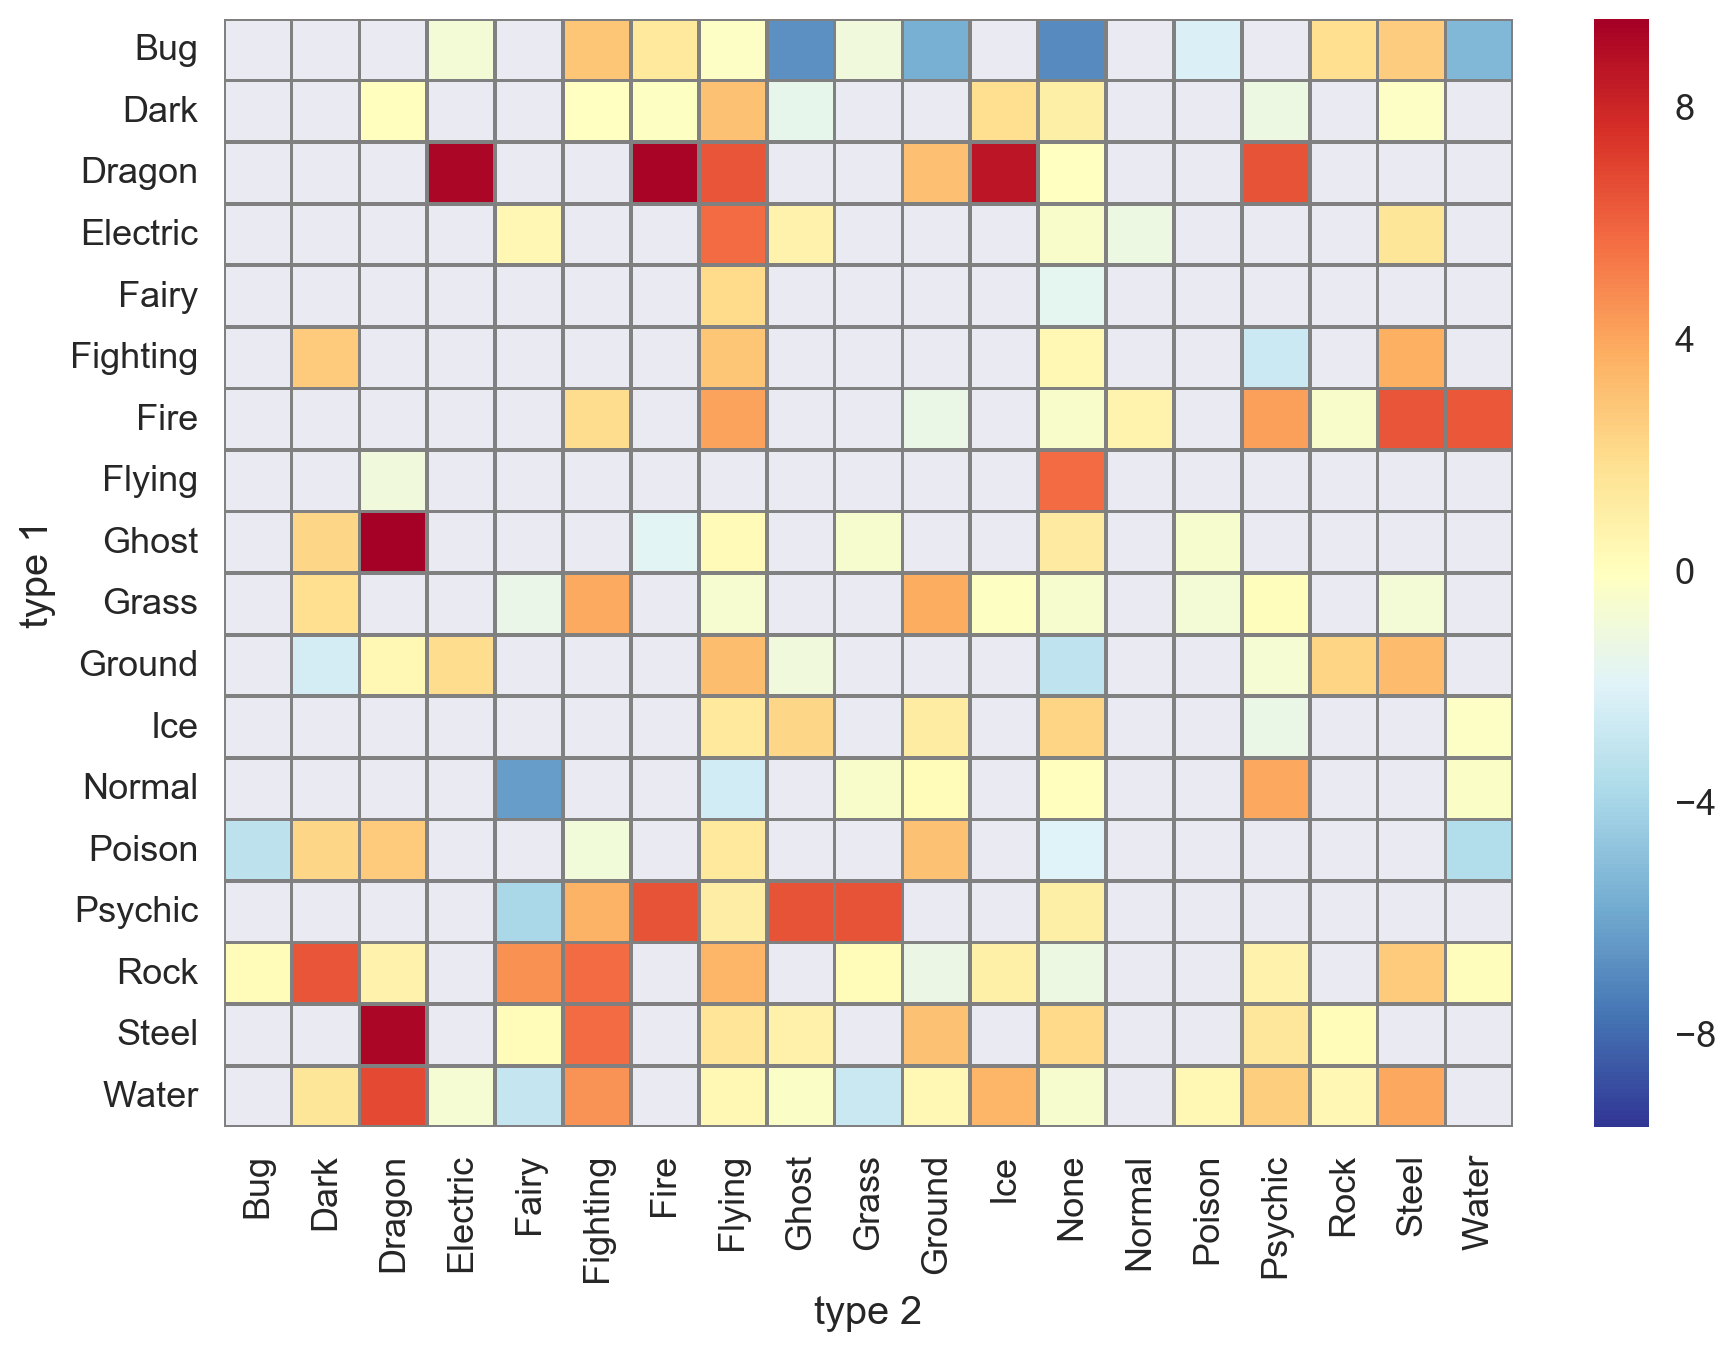

In [406]:
# Join the norm_stats table with the pokedex table based on id number
joined = pd.merge(
    pokedex,
    norm_stats,
    on='id'
)

# Calculate the median strength of each primary and secondary type
medians = joined.groupby(['type 1', 'type 2'])['total'].median()

# Display a heatmap of the median strength of each primary and secondary type
sns.heatmap(
    medians.unstack(),
    linewidths=1,
    cmap='RdYlBu_r',
    linecolor='grey'
);

The heatmap is teeming with information but it's difficult to determine the strongest type combinations. Let's just identify the top five.

In [385]:
# Rearrange the medians table and sort by the strongest combination of primary
# and secondary type
medians.reset_index().sort_values('total', ascending=False).head()

,type 1,type 2,total
53,Ghost,Dragon,9.559583
22,Dragon,Fire,9.358342
119,Steel,Dragon,9.299880
21,Dragon,Electric,9.293747
25,Dragon,Ice,8.702948


We can draw a few conclusions from these data:
- Among the strongest Pokemon are Dragon-type (as primary or secondary), Psychic-type (as primary), Fighting-type (as secondary) and Flying-type (as secondary)
- Among the weakest Pokemon are Bug-type (as primary)
- The five strongest combinations of primary and secondary types are, in order, Ghost/Dragon, Dragon/Fire, Steel/Dragon, Dragon/Electric and Dragon/Ice.

Since legendary Pokemon are typically vastly stronger than non-legendary Pokemon, the former group may be skewing the results. Therefore, let's take a look at the same comparison as above without any legendary Pokemon included and then list the five strongest combinations.

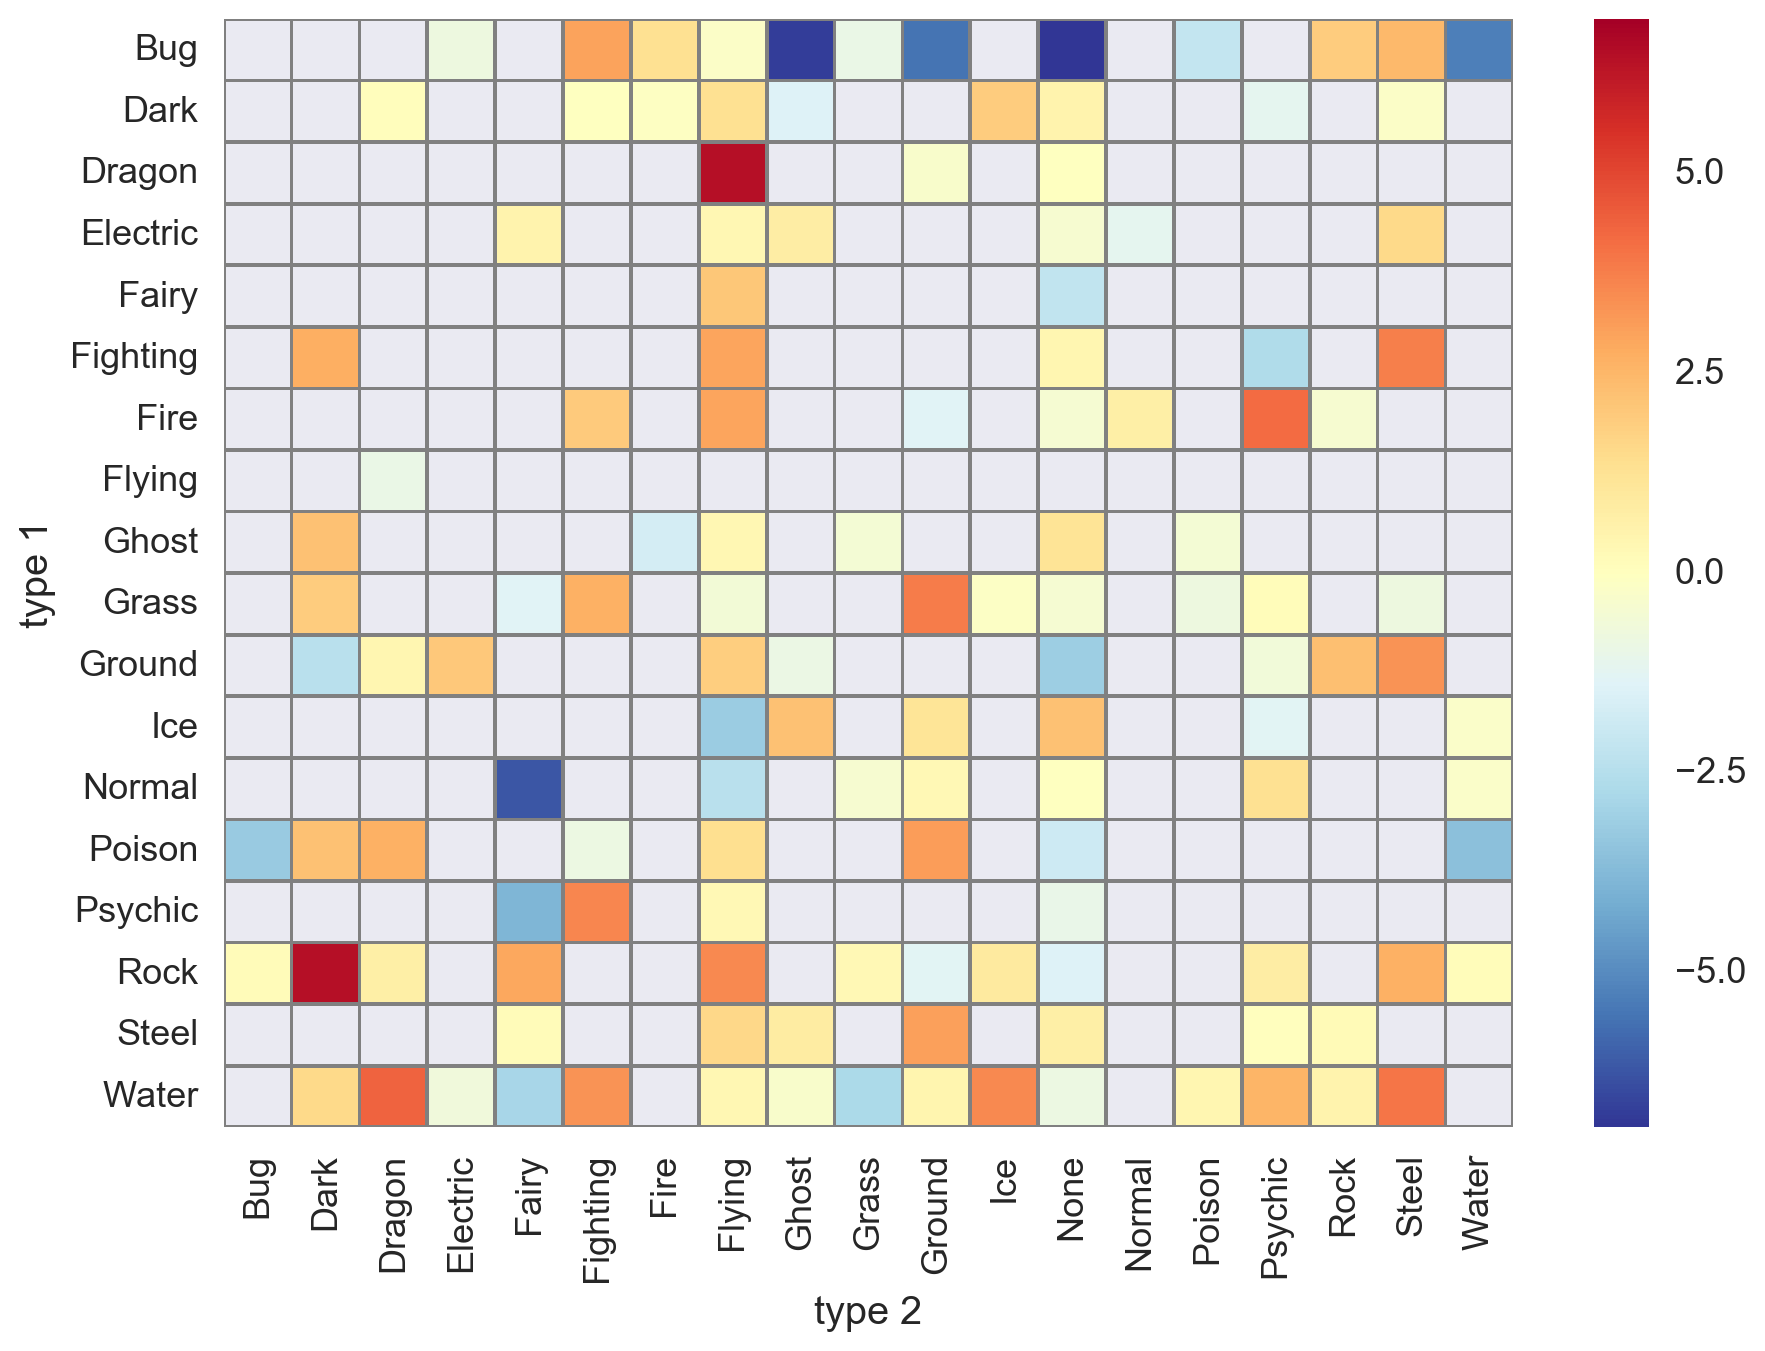

In [386]:
# Join the norm_stats table with the pokedex table based on id number for
# non-legendary Pokemon only
joined_nolegs = pd.merge(
    pokedex[~pokedex['legendary']],
    norm_stats,
    on='id'
)

# Calculate the median strength of each primary and secondary type
medians = joined_nolegs.groupby(['type 1', 'type 2'])['total'].median()

# Display a heatmap of the median strength of each primary and secondary type
sns.heatmap(
    medians.unstack(),
    linewidths=1,
    cmap='RdYlBu_r',
    linecolor='grey'
);

In [387]:
# Rearrange the medians table and sort by the strongest combination of primary
# and secondary type for non-legendary Pokemon
medians.reset_index().sort_values('total', ascending=False).head()

,type 1,type 2,total
21,Dragon,Flying,6.480187
96,Rock,Dark,6.472608
115,Water,Dragon,4.344018
42,Fire,Psychic,4.201712
128,Water,Steel,4.003064


The results change a bit when excluding legendary Pokemon: Dragon-type are not as dominating anymore and there is a lot more diversity in strength between types, indicating that many of legendary Pokemon are Dragon-type. Unfortunately for Bug-type Pokemon, they're still among the weakest.

We have to be careful with the validity of these conclusions because the heatmaps hide the number of Pokemon in each combination, but as a rule of thumb, you can't go wrong with Dragon-type but avoid Bug-type Pokemon!

## 5. Are there any trends between a Pokemon's statistics and its type?


As certain Pokemon types are stronger than others, let's investigate whether these types excel at a specific statistic, while focusing on primary types only.

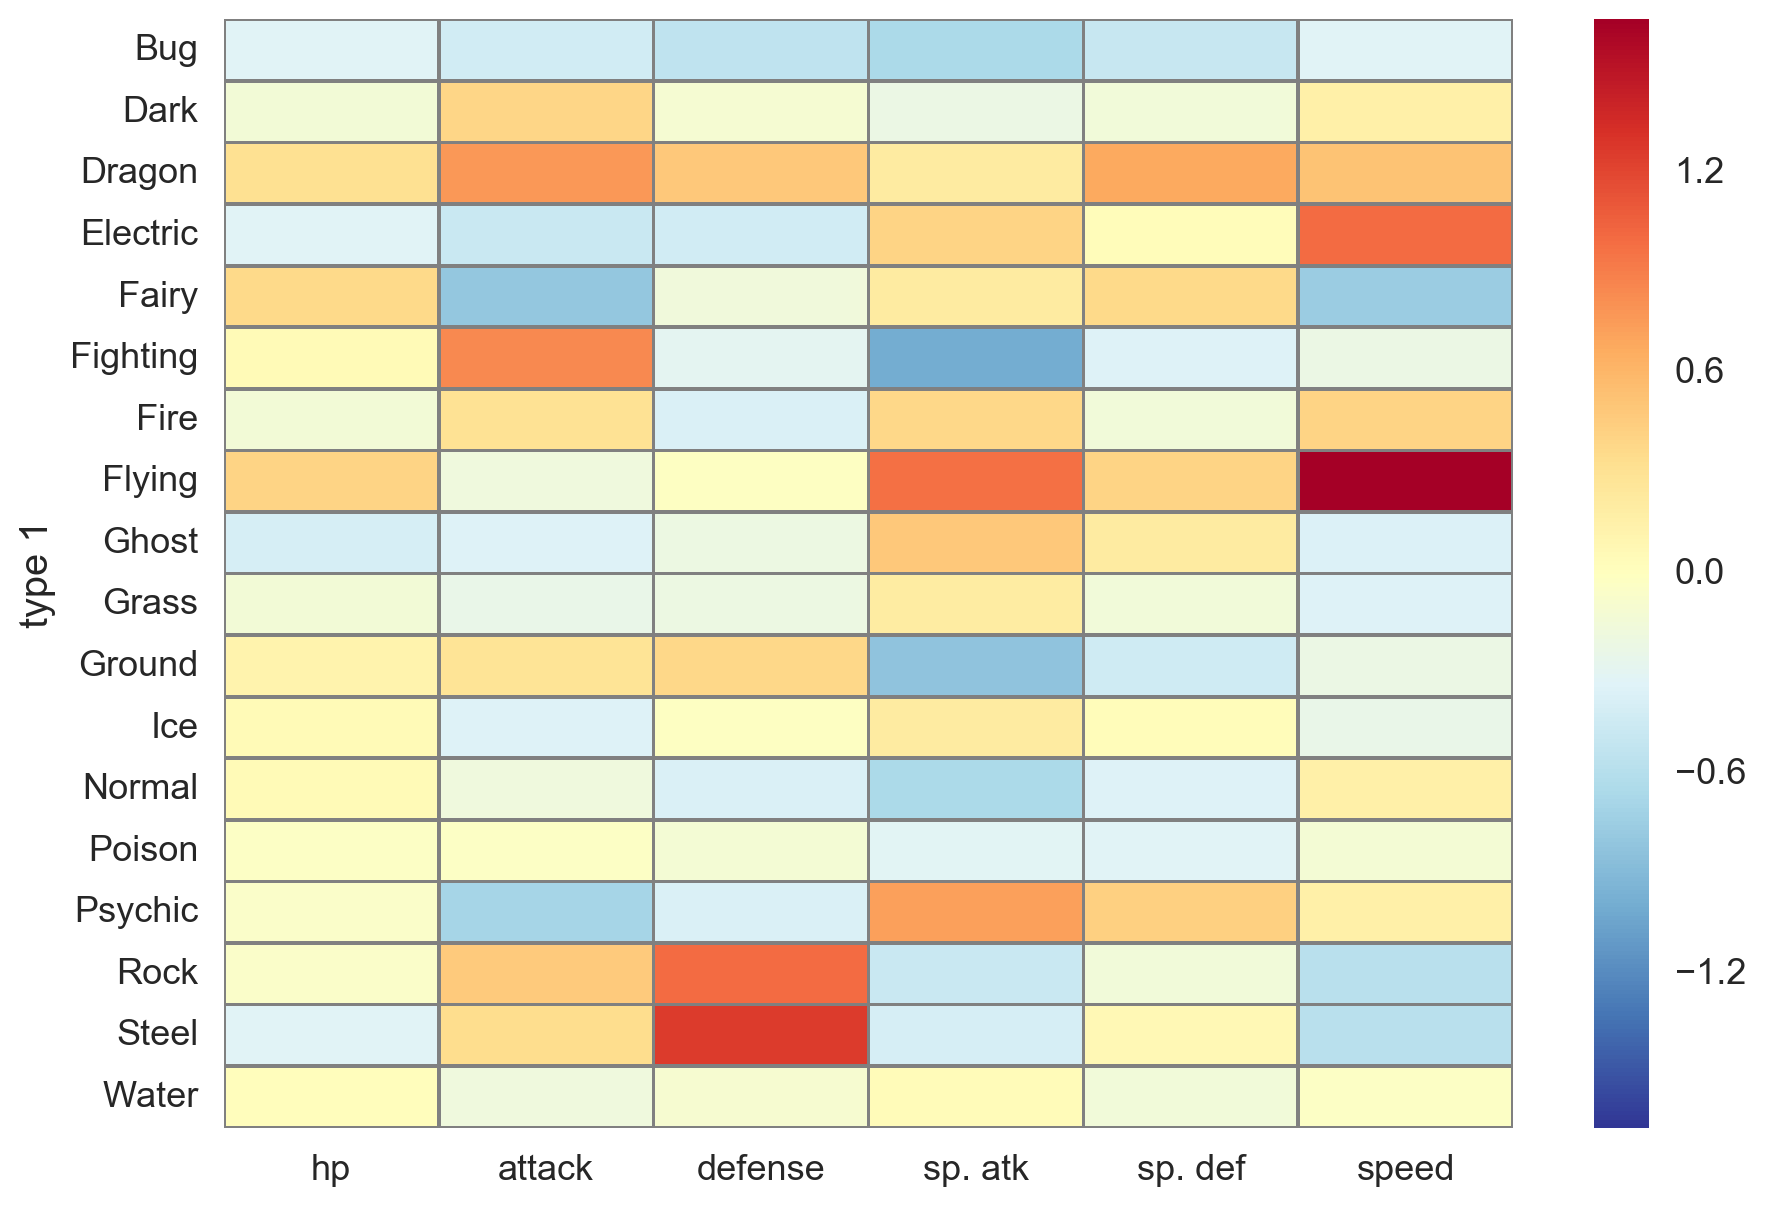

In [403]:
# Display a heatmap of the distribution of statistics across primary types
sns.heatmap(
    joined.groupby('type 1').median().loc[:, 'hp':'speed'], 
    linewidths=1,
    cmap='RdYlBu_r',
    linecolor='grey'
);

Only a few conclusions pop out of this plot:
- Flying-type Pokemon are really fast!
- Among the Pokemon with the highest defense are Rock- and Steel-type Pokemon

Again, including legendary Pokemon may be skewing the results so let's take a look at the same distribution again.

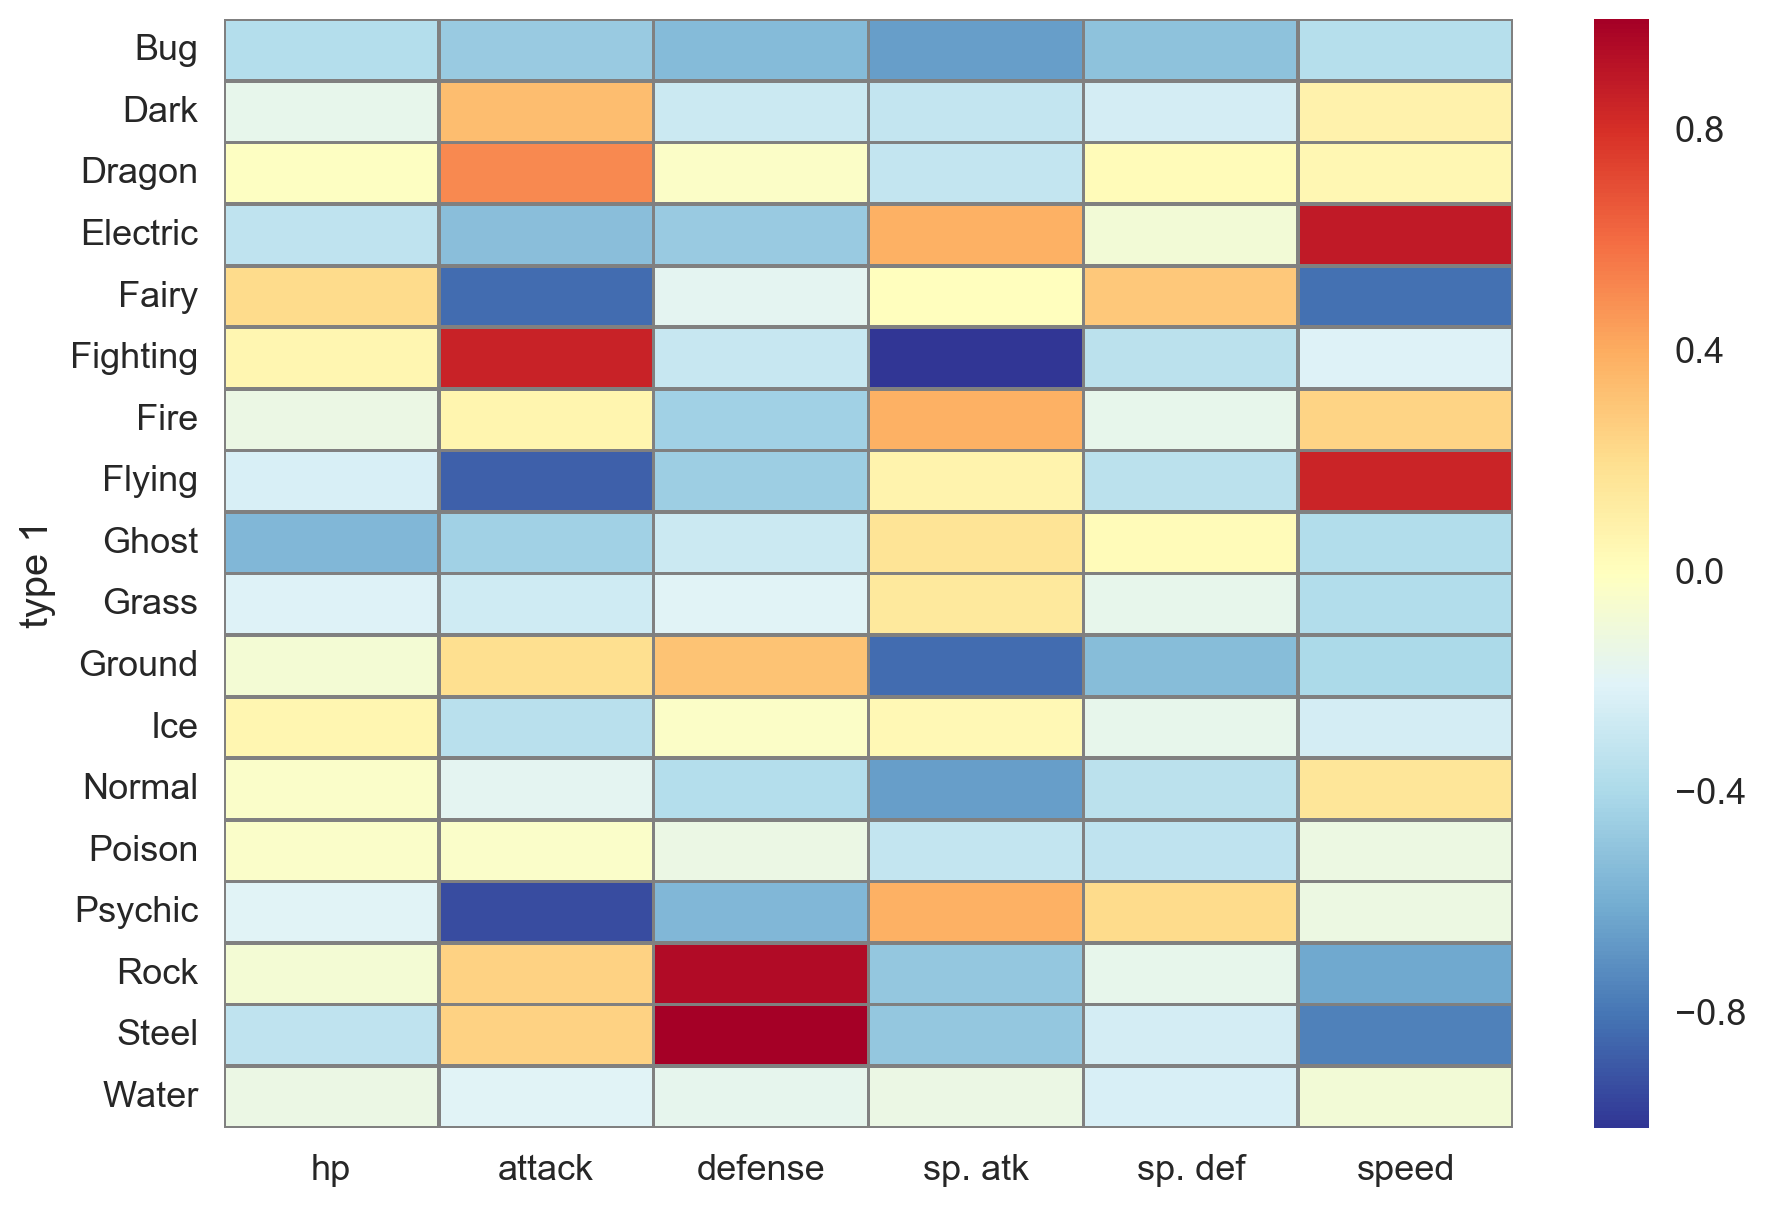

In [401]:
# Display a heatmap of the distribution of statistics across primary types
# for non-legendary Pokemon
sns.heatmap(
    joined_nolegs.groupby('type 1').median().loc[:, 'hp':'speed'], 
    linewidths=1,
    cmap='RdYlBu_r',
    linecolor='grey'
);

Now this is more like it! We can draw several conclusions now:
- The fastest Pokemon are by far Flying-type and Electric-type, while Fairy-type and Steel-type are terribly slow
- Fighting-type Pokemon have unparalleled attack power but the worst special attack power
- Psychic-type, Flying-type and Fairy-type Pokemon have terrible attack power
- Rock- and Steel-type Pokemon still have the best defense